In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
plt.style.use('ggplot')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 12

COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR

In [2]:
df = pd.read_pickle("dataframes/df_n_experts.pd")
df["gate"] = df["gate"].astype(str)
df

,dataset,n_features,train,test,train_std,test_std,n_experts,depth,gate
0,generated6,2,0.641467,0.639400,0.001852,0.008586,1,1,feature_importance_lr_max
1,generated6,2,0.741067,0.738800,0.003441,0.012060,1,2,feature_importance_lr_max
2,generated6,2,0.741667,0.738800,0.003726,0.008514,2,1,feature_importance_lr_max
3,generated6,2,0.815800,0.811200,0.001783,0.006425,2,2,feature_importance_lr_max
4,generated6,2,0.754067,0.748600,0.026387,0.021963,3,1,feature_importance_lr_max
...,...,...,...,...,...,...,...,...,...
555,banknote,4,1.000000,0.997085,0.000000,0.002062,8,2,None
556,banknote,4,1.000000,0.997813,0.000000,0.001262,9,1,None
557,banknote,4,1.000000,0.997085,0.000000,0.002062,9,2,None
558,banknote,4,0.999514,0.997813,0.000486,0.001262,10,1,None


In [3]:
colormap = { 
    'iris_input.pd': "#8EBA42",
    'breast_cancer_input.np' : "#FBC15E" ,
    'cars_input.pd' : "#B97357",
    'abalone_input.pd': "#348ABD",
    'steel_input.pd': "#988ED5",
    'contraceptive_input.pd' : "#E24A33" ,
    'students_input.pd' : "#81D0DB",
    
    'occupancy_input.pd' : "#348ABD",
    'banknote_input.pd' : "#81D0DB",
    'pdm6_input.pd' : "#FBC15E",
    'bank_input.pd' : "#8EBA42",
    'adult_input.pd' :"#E24A33",
    'hrss_input.pd' : "#988ED5",
    
    'generated6_input.np' : "grey",
}
datasets1 = [
             'iris_input.pd',
             'breast_cancer_input.np',
             'cars_input.pd',
             'abalone_input.pd',
             'steel_input.pd',
             'students_input.pd',
             'contraceptive_input.pd',
]
datasets2 = [
             'occupancy_input.pd',
             'banknote_input.pd',
             'pdm6_input.pd',
             'bank_input.pd',
             'adult_input.pd',
             'hrss_input.pd',
]
datasets3 = [
    'generated6_input.np',
]

In [4]:
 df[(df.dataset ==  "iris") & (df.gate == "None") & (df.depth == 2)]

,dataset,n_features,train,test,train_std,test_std,n_experts,depth,gate
101,iris,4,0.964444,0.933321,0.008891,0.030152,1,2,None
103,iris,4,0.993343,0.966750,0.007344,0.022148,2,2,None
105,iris,4,0.997788,0.953236,0.003832,0.022471,3,2,None
107,iris,4,0.997788,0.959993,0.003832,0.013348,4,2,None
109,iris,4,0.997768,0.933677,0.003866,0.039181,5,2,None
111,iris,4,0.997788,0.905939,0.003832,0.056193,6,2,None
113,iris,4,0.995555,0.926920,0.004445,0.050260,7,2,None
115,iris,4,0.993323,0.932966,0.003855,0.030618,8,2,None
117,iris,4,0.995536,0.953414,0.004464,0.011307,9,2,None
119,iris,4,0.995555,0.946657,0.004445,0.026683,10,2,None


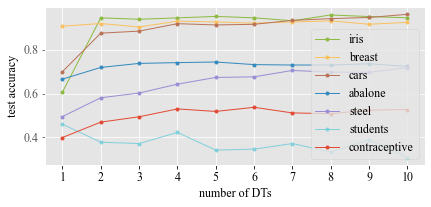

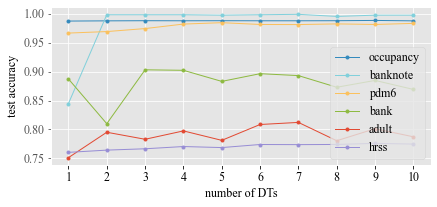

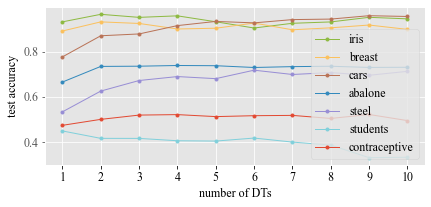

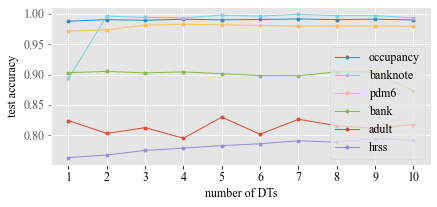

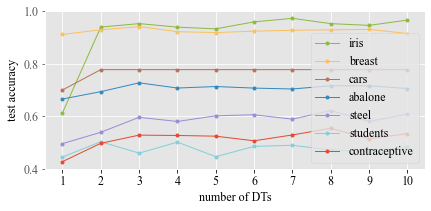

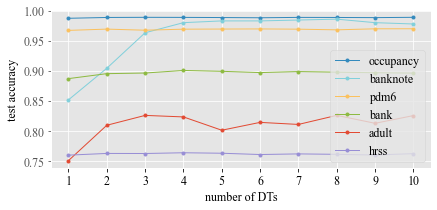

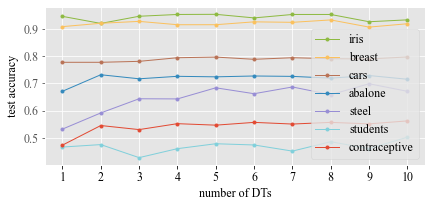

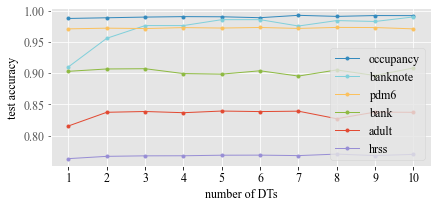

In [5]:
for gate in ["None","feature_importance_lr_max"]:
    for depth in [1,2]:
        first_set = True
        for datasets_chunk in [datasets1,datasets2]:
            if first_set:
                first_set = False
                chunk_name = "datasets1"
            else:
                chunk_name = "datasets2"
            for dataset in datasets_chunk:
                dataset_name = dataset.split("_")[0]

                slice1 = df[(df.dataset ==  dataset_name) & (df.gate == gate) & (df.depth == depth)]
                fig = plt.gcf()
                fig.set_size_inches(6.8, 2.9)
                plt.xticks(df.n_experts.unique())
                plt.ylabel("test accuracy", fontsize=12)
                plt.xlabel("number of DTs", fontsize=12)
                #plt.title(str(gate) + " " + str(depth))
                ax = plt.gca()
                #ax.set_ylim(top=1) 
                plt.plot(slice1.n_experts,slice1.test,linewidth=1,linestyle='-',marker=".",color=colormap[dataset],label=dataset_name)
                ax.legend(loc="lower right")  
            #plt.savefig("plots/n_experts_{}_{}_{}.pdf".format(gate,str(depth),chunk_name), bbox_inches="tight")
            plt.show()


In [6]:
colormap = {    
    1 : "#348ABD",
    2 : "#E24A33",
}

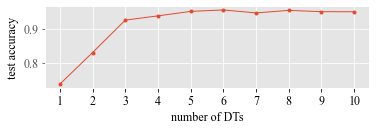

In [11]:
#Additional data set
for gate in ["None"]:
    for depth in [2]:
        dataset_name = "generated6"
        slice1 = df[(df.dataset ==  dataset_name) & (df.gate == gate) & (df.depth == depth)]
        fig = plt.gcf()
        fig.set_size_inches(5.8, 1.5)
        plt.xticks(df.n_experts.unique())
        plt.ylabel("test accuracy", fontsize=12)
        plt.xlabel("number of DTs", fontsize=12)
        #plt.title(str(gate) + " " + str(depth))
        ax = plt.gca()
        #ax.set_ylim([0.3,1])    
        plt.plot(slice1.n_experts,slice1.test,linewidth=1,linestyle='-',marker=".",color=colormap[depth])
        #ax.legend(loc="lower right")    
    plt.savefig("plots/n_experts_{}_{}_{}.pdf".format(gate,str(depth),"generated2"), bbox_inches="tight")
    plt.show()

In [ ]:
#Additional data set
for gate in ["None"]:
    for depth in [1,2]:
        dataset_name = "generated6"
        slice1 = df[(df.dataset ==  dataset_name) & (df.gate == gate) & (df.depth == depth)]
        fig = plt.gcf()
        fig.set_size_inches(5.8, 1.5)
        plt.xticks(df.n_experts.unique())
        plt.ylabel("test accuracy", fontsize=12)
        plt.xlabel("number of DTs", fontsize=12)
        #plt.title(str(gate) + " " + str(depth))
        ax = plt.gca()
        #ax.set_ylim([0.3,1])    
        plt.plot(slice1.n_experts,slice1.test,linewidth=1,linestyle='-',marker=".",color=colormap[depth],label= "depth: " + str(depth))
        ax.legend(loc="lower right")    
    plt.savefig("plots/n_experts_{}_{}_{}.pdf".format(gate,str(depth),"generated"), bbox_inches="tight")
    plt.show()

In [8]:
df[(df.dataset ==  "generated6") & (df.gate == "None") & (df.depth == 2)]

,dataset,n_features,train,test,train_std,test_std,n_experts,depth,gate
21,generated6,2,0.741267,0.7384,0.004636,0.008447,1,2,None
23,generated6,2,0.838667,0.8306,0.011390,0.018611,2,2,None
25,generated6,2,0.928933,0.9252,0.036193,0.041847,3,2,None
27,generated6,2,0.945000,0.9376,0.013796,0.012027,4,2,None
29,generated6,2,0.955467,0.9506,0.015260,0.009110,5,2,None
31,generated6,2,0.962933,0.9548,0.005007,0.005231,6,2,None
33,generated6,2,0.953067,0.9462,0.011140,0.013451,7,2,None
35,generated6,2,0.962267,0.9536,0.007099,0.011482,8,2,None
37,generated6,2,0.956800,0.9498,0.006543,0.013391,9,2,None
39,generated6,2,0.961000,0.9496,0.009018,0.009069,10,2,None
